## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 3
## Linear and MultiLinear Regression

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [66]:
df = pd.read_csv("../data/winequality-red.csv", delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [67]:
print(df.shape)

(1599, 12)


In [68]:
def removeOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3  = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df_low = Q1 - 1.5*IQR
    df_hi = Q3 + 1.5*IQR
    new_df = df[(df[col] < df_hi) & (df[col] > df_low)].reset_index(drop=True)
    return new_df

df = removeOutliers(df,'alcohol')
df = removeOutliers(df,'quality')

In [69]:
df.dropna()
print(df.shape)

(1559, 12)


In [70]:
x = df[['alcohol']]
y = df[['quality']]

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [72]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1091, 1) (468, 1) (1091, 1) (468, 1)


In [73]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [74]:
print(reg.coef_)
print(reg.intercept_)

[[0.31691214]]
[2.32702455]


In [75]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_range)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


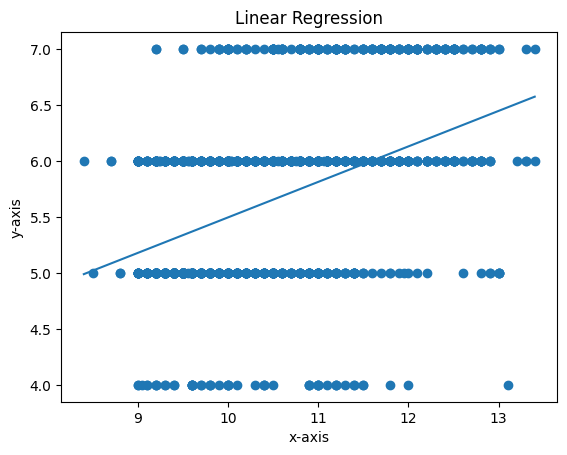

In [76]:
plt.scatter(x, y)
plt.plot(x_range, y_pred)

plt.title("Linear Regression")
plt.ylabel("y-axis")
plt.xlabel("x-axis")

plt.show()

In [77]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
print(mse)
print(r)

0.438479605311069
0.2684970669546982


In [78]:
df['alcohol'].corr(df['quality'])

0.4653354383047946

In [79]:
df.shape

(1559, 12)

In [80]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
for col in columns:
    df = removeOutliers(df,col)

In [81]:
df.dropna()
print(df.shape)

(1125, 12)


In [82]:
x1 = np.column_stack((df[['fixed acidity']], df[['volatile acidity']], df[['citric acid']], df[['residual sugar']], df[['chlorides']], df[['free sulfur dioxide']], df[['total sulfur dioxide']], df[['density']], df[['pH']], df[['sulphates']], df[['alcohol']]))
y1 = df[['quality']]

In [83]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [84]:
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(787, 11) (338, 11) (787, 1) (338, 1)


In [85]:
reg1 = LinearRegression()
reg1.fit(x1_train, y1_train)

LinearRegression()

In [86]:
print(reg1.coef_)
print(reg1.intercept_)

[[-8.61380808e-03 -8.34861131e-01 -3.42775813e-01 -1.27362101e-02
  -1.81301428e+00  2.88294134e-03 -1.67378349e-03  1.42087081e+01
  -7.16047948e-01  1.87430781e+00  2.94614575e-01]]
[-9.59959429]


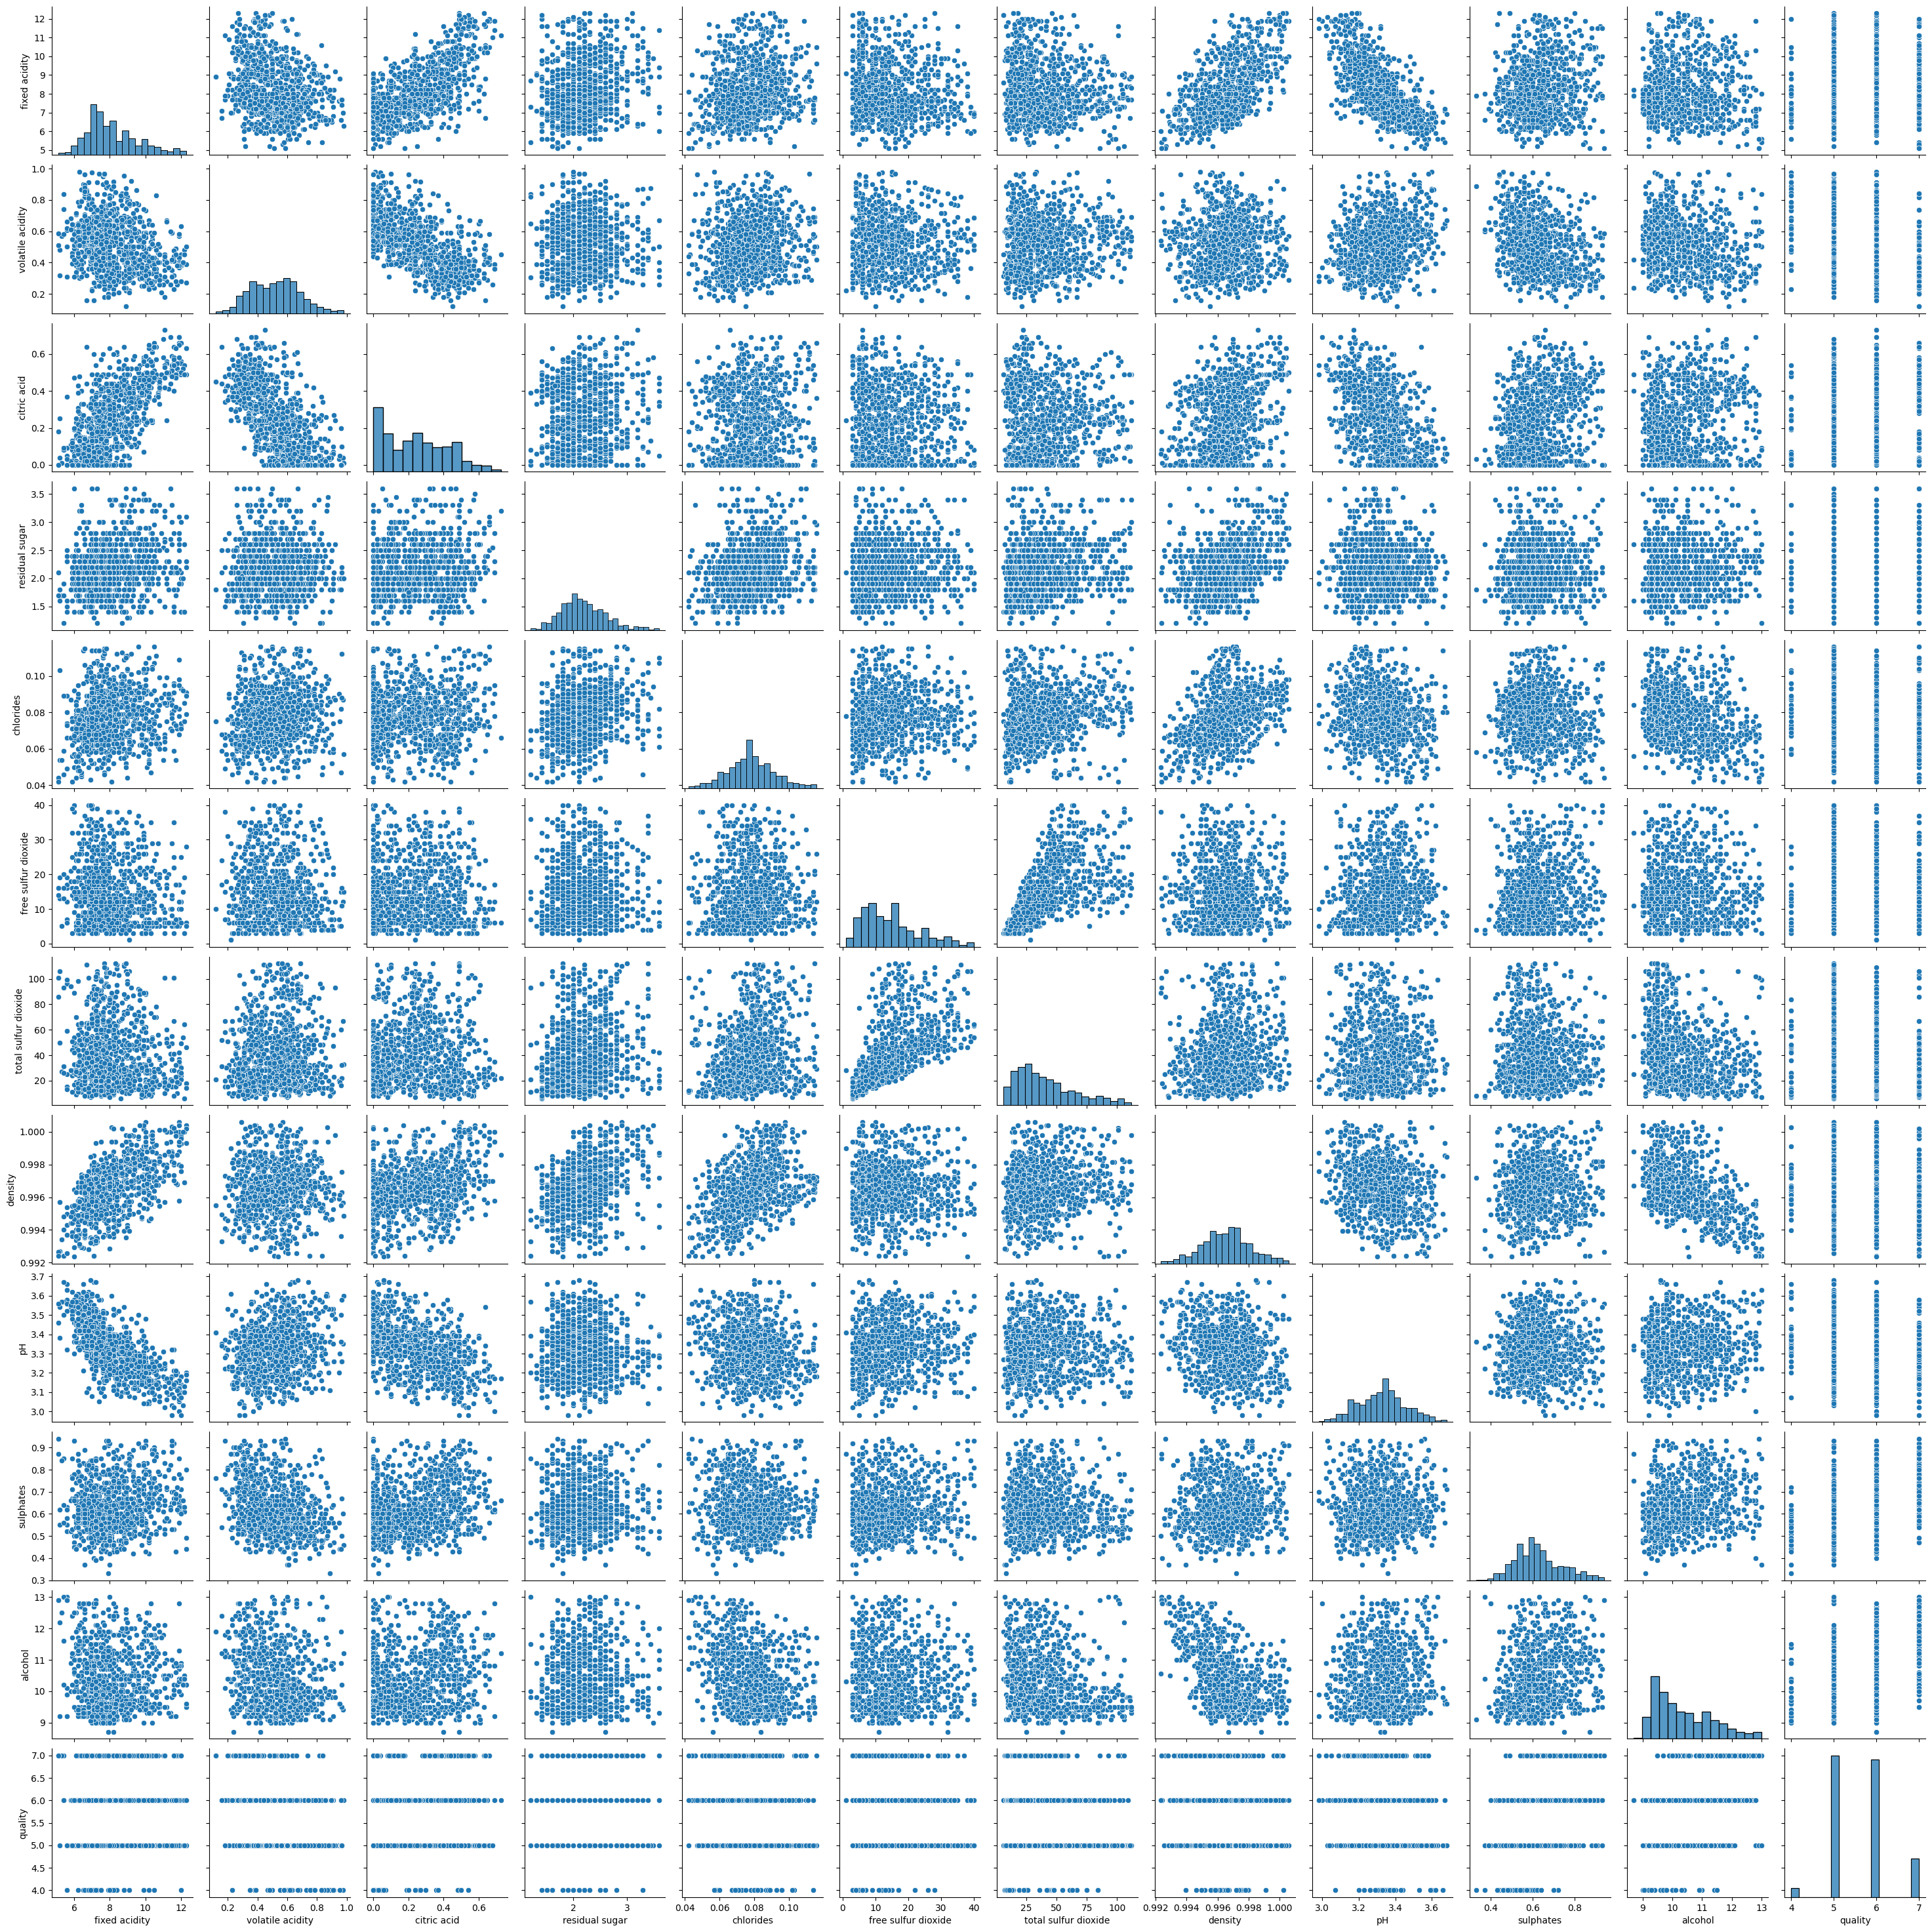

In [87]:
sns.pairplot(df)

In [88]:
y1_pred = reg1.predict(x1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
r1 = r2_score(y1_test, y1_pred)
print(mse1)
print(r1)

0.31467135863704015
0.3688230441721676
